## Regression Problem Statements
### Algorithms Used: Linear Regression, Multiple Linear Regression and Random Forest Regressor
1. Predicting number of crimes based on hour of the day.
2. Predicting number of crimes in a given month. 
3. Predicting number of crimes based on the hour of the day and month of the year.
4. Predicting monthly crime volumns accross different areas with victim demographics(age,sex,descent).

#### Importing dependencies and  EDA

In [234]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score , mean_squared_error

In [16]:
#Loading dataset
data = pd.read_csv("LA_Crime_dataset.csv")

In [17]:
#Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

In [18]:
data.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004975e+06,327247.000000,1.004980e+06,69160.000000,2314.000000,64.00000,1.004991e+06,1.004991e+06
mean,2.202215e+08,1.339900e+03,1.069174e+01,1.115633e+03,1.400348e+00,5.001568e+02,2.891706e+01,3.056201e+02,363.955300,4.999174e+02,958.101258,984.015990,991.21875,3.399821e+01,-1.180909e+02
std,1.319718e+07,6.510613e+02,6.110255e+00,6.111605e+02,4.899691e-01,2.052731e+02,2.199272e+01,2.193021e+02,123.734528,2.050736e+02,110.354348,52.350982,27.06985,1.610713e+00,5.582386e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,310.000000,821.00000,0.000000e+00,-1.186676e+02
25%,2.106169e+08,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,311.000000,3.310000e+02,998.000000,998.000000,998.00000,3.401470e+01,-1.184305e+02
50%,2.209159e+08,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.00000,3.405890e+01,-1.183225e+02
75%,2.311103e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.00000,3.416490e+01,-1.182739e+02
max,2.521041e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,516.000000,9.560000e+02,999.000000,999.000000,999.00000,3.433430e+01,0.000000e+00


### Linear Regression: Predicting number of crimes based on hour of the day.

#### Data Preprocessing for Linear and Multi Regression

In [25]:
#Dataset
one_reg_data = data[["DATE OCC", "TIME OCC"]]
one_reg_data.head()

,DATE OCC,TIME OCC
0,11/07/2020 12:00:00 AM,845
1,10/18/2020 12:00:00 AM,1845
2,10/30/2020 12:00:00 AM,1240
3,12/24/2020 12:00:00 AM,1310
4,09/29/2020 12:00:00 AM,1830


In [26]:
#converting column from object to string
one_reg_data["TIME OCC"] = one_reg_data["TIME OCC"].astype('string').str.zfill(4) #converting from string to datetime
one_reg_data["DATE OCC"] = one_reg_data["DATE OCC"].astype(str) #using .zfill for nmaking tume column even for datetome conversion
#converting time coluumn to datetime, using mixed format considering the above data
one_reg_data["TIME OCC"] = pd.to_datetime(one_reg_data["TIME OCC"], format = "%H%M")
one_reg_data['hour'] = one_reg_data['TIME OCC'].dt.hour # creating hour column from dt.hour
one_reg_data["DATE OCC"] = pd.to_datetime(one_reg_data["DATE OCC"]) # string to datetime form, keepin formt as default
one_reg_data["month"] = one_reg_data["DATE OCC"].dt.month #extracting month column from date

C:\Users\abhes\AppData\Local\Temp\ipykernel_24392\738697821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_reg_data["TIME OCC"] = one_reg_data["TIME OCC"].astype('string').str.zfill(4) #converting from string to datetime
C:\Users\abhes\AppData\Local\Temp\ipykernel_24392\738697821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_reg_data["DATE OCC"] = one_reg_data["DATE OCC"].astype(str) #using .zfill for nmaking tume column even for datetome conversion
C:\Users\abhes\AppData\Local\Temp\ipyke

In [24]:
#droppping irrelevant column
one_reg_data.drop(['DATE OCC', 'TIME OCC'], axis=1, inplace=True)

C:\Users\abhes\AppData\Local\Temp\ipykernel_24392\2786546771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_reg_data.drop(['DATE OCC', 'TIME OCC'], axis=1, inplace=True)


#### Exporting dataset

In [243]:
#Making datasets for first problem statement 

#crime_counts_hours for predicting crime based on hour
crime_counts_hour = one_reg_data.groupby("hour").size().reset_index(name="crime_count")
#crime_counts_month for predicting count of crime based on month
crime_counts_month = one_reg_data.groupby("month").size().reset_index(name="crime_count") 
# crime_counts_multi for predicting count of crime based on month and hour
crime_counts_multi = one_reg_data.groupby(["hour","month"]).size().reset_index(name="crime_count") 

#Exporting datasets for future use
crime_counts_hour.to_csv('regression_dataset/crime_counts_hour',index = False)
crime_counts_month.to_csv('regression_dataset/crime_counts_month',index = False)
crime_counts_multi.to_csv('regression_dataset/crime_counts_by_month_and_hours', index = False)

#### Model Creation and Evaluation

In [107]:
#Linear-Regression: Predicting crime based on hour
X = crime_counts_hour[["hour"]]
y = crime_counts_hour["crime_count"]
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2,random_state = 1)
lr_1 = LinearRegression()
lr_1.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [108]:
#predictions
predict = lr_1.predict(xtest)
predict

array([43388.35607321, 50154.35163616, 29856.36494731, 44741.5551858 ,
       52860.74986134])

In [109]:
#Evaluations
mae = mean_absolute_error(ytest,predict)
mse = mean_squared_error(ytest,predict)
rsme = np.sqrt(mse)
r2 = r2_score(ytest,predict)
print(f" R-Squared Error: {r2}\n",f"Mean Absolute Error: {mae}\n", f"Mean Squared Error: {mse}\n", f"Root Mean Squared Error: {rsme}")

 R-Squared Error: 0.7804591255456192
 Mean Absolute Error: 5543.270438158627
 Mean Squared Error: 38533355.93557687
 Root Mean Squared Error: 6207.524138944356


#### Visualization

In [110]:
pred_for_plot = lr_1.predict(X)

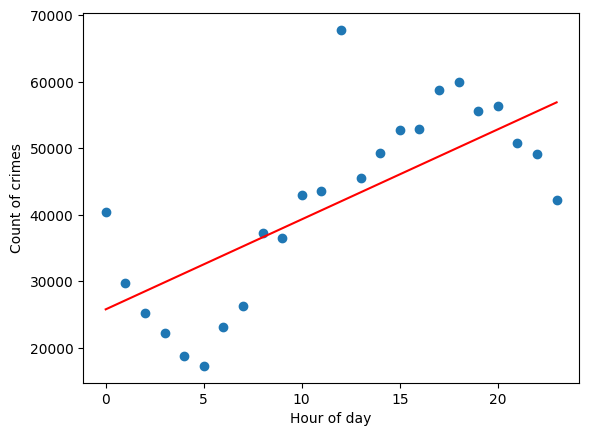

In [111]:
#plotting a scatter plot with a regression line
plt.scatter(X,y)
plt.plot(X,pred_for_plot, color = "red")
plt.xlabel("Hour of day")
plt.ylabel("Count of crimes")
plt.show()

### Linear Regression: Predicting number of crimes in a given month.

#### Model Creation

In [246]:
X = crime_counts_month['month']
y = crime_counts_month['crime_count']
xtrain,ytrain,xtest,ytest = train_test_split(X,y, test_size = 0.2 ,random_state =42)

In [261]:
lr_2 = LinearRegression()
lr_2.fit(xtrain,ytrain)
predict = lr_2.predict(xtest)

#### Model Evaluation

In [262]:
#Evaluations
mae = mean_absolute_error(ytest,predict)
mse = mean_squared_error(ytest,predict)
rsme = np.sqrt(mse)
r2 = r2_score(ytest,predict)
print(f" R-Squared Error: {r2}\n",f"Mean Absolute Error: {mae}\n", f"Mean Squared Error: {mse}\n", f"Root Mean Squared Error: {rsme}")

 R-Squared Error: 0.5132153957358374
 Mean Absolute Error: 613.8599225013252
 Mean Squared Error: 660270.6991017326
 Root Mean Squared Error: 812.5704271641521


### Multi Linear Regression: Predicting number of crimes based on the hour of the day and month of the year.

#### Model Creation

In [247]:
#Building mulitple linear regression model: Predicting crime based on hour
X = crime_counts_multi.iloc[:,:-1]
y = crime_counts_multi.iloc[:,-1]
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2,random_state = 1)
multi_lr = LinearRegression()
multi_lr.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [259]:
#prediction
predict = multi_lr.predict(xtest)

#### Model Evaluations

In [248]:
#Evaluations
mae = mean_absolute_error(ytest,predict)
mse = mean_squared_error(ytest,predict)
r2 = r2_score(ytest,predict)
print(f" R-Squared Error: {r2}\n",f"Mean Absolute Error: {mae}\n", f"Mean Squared Error: {mse}\n")

 R-Squared Error: 0.5132153957358374
 Mean Absolute Error: 613.8599225013252
 Mean Squared Error: 660270.6991017326



In [250]:
multi_lr.coef_

array([125.79985936, -32.054429  ])

In [251]:
pred_for_plot = multi_lr.predict(X)

#### Visualization

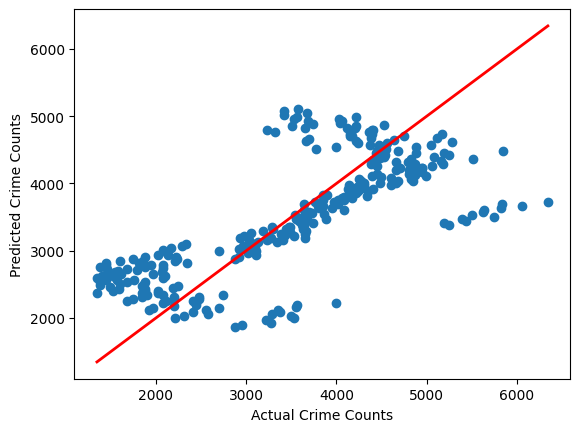

In [117]:
#plotting a scatter plot with a regression line
plt.scatter(y, pred_for_plot,label='Model Predictions')
# Add a 45-degree line for reference (perfect prediction)
perfect_line = np.linspace(y.min(), y.max(), 100)
plt.plot(perfect_line, perfect_line, color='red', linestyle='-', linewidth=2, label='Perfect Prediction')
plt.xlabel("Actual Crime Counts")
plt.ylabel("Predicted Crime Counts")
plt.show()

### Random Forest Regressor: Predicting monthly crime counts accross different areas with victim demographics(age,sex,descent).

#### Data Information and EDA

In [120]:
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


In [125]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [145]:
data["AREA NAME"].unique()

array(['N Hollywood', 'Van Nuys', 'Wilshire', 'Pacific', 'Hollenbeck',
       'Southwest', 'Northeast', 'Devonshire', 'Topanga', 'Hollywood',
       'Olympic', 'Southeast', 'Newton', 'Foothill', 'Mission', 'Rampart',
       'Central', 'West LA', '77th Street', 'West Valley', 'Harbor'],
      dtype=object)

#### Data Preprocessing for Random Forest Regressor

In [215]:
random_forest_data = data[["DR_NO","AREA NAME","Vict Age","Vict Sex", "Vict Descent"]]
random_forest_data['month'] = one_reg_data["month"]
random_forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   DR_NO         1004991 non-null  int64 
 1   AREA NAME     1004991 non-null  object
 2   Vict Age      1004991 non-null  int64 
 3   Vict Sex      1004991 non-null  object
 4   Vict Descent  860335 non-null   object
 5   month         1004991 non-null  int32 
dtypes: int32(1), int64(2), object(3)
memory usage: 42.2+ MB


C:\Users\abhes\AppData\Local\Temp\ipykernel_24392\2248391875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_forest_data['month'] = one_reg_data["month"]


In [216]:
random_forest_data.isna().sum()

DR_NO                0
AREA NAME            0
Vict Age             0
Vict Sex             0
Vict Descent    144656
month                0
dtype: int64

In [217]:
random_forest_data

,DR_NO,AREA NAME,Vict Age,Vict Sex,Vict Descent,month
0,211507896,N Hollywood,31,M,H,11
1,201516622,N Hollywood,32,M,H,10
2,240913563,Van Nuys,30,M,W,10
3,210704711,Wilshire,47,F,A,12
4,201418201,Pacific,63,M,H,9
...,...,...,...,...,...,...
1004986,252104112,Topanga,35,M,X,2
1004987,250404100,Hollenbeck,11,M,B,2
1004988,251304095,Newton,16,F,H,1
1004989,251704066,Devonshire,17,M,H,1


In [220]:
#sinnce the null values are categorical, we are creating another "Unknown" category to fill the data
random_forest_data['Vict Sex'].fillna("Unknown",inplace =True)
random_forest_data['Vict Descent'].fillna("Unknown", inplace=True)

C:\Users\abhes\AppData\Local\Temp\ipykernel_24392\2126210409.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  random_forest_data['Vict Sex'].fillna("Unknown",inplace =True)
C:\Users\abhes\AppData\Local\Temp\ipykernel_24392\2126210409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_forest_data['Vict Sex'].fillna("Unknown",inplace 

In [221]:
random_forest_data['Vict Sex'].unique()

array(['M', 'F', 'Unknown', 'X', 'H', '-'], dtype=object)

In [222]:
random_forest_data['Vict Descent'].unique()

array(['H', 'W', 'A', 'B', 'Unknown', 'X', 'O', 'C', 'J', 'V', 'K', 'F',
       'I', 'Z', 'L', 'G', 'P', 'D', 'U', 'S', '-'], dtype=object)

In [223]:
random_forest_data.isna().sum()

DR_NO           0
AREA NAME       0
Vict Age        0
Vict Sex        0
Vict Descent    0
month           0
dtype: int64

In [225]:
# This code will create your aggregated dataset
agg_data = random_forest_data.groupby(['month', 'AREA NAME']).agg(
    crime_count=('DR_NO', 'count'),
    avg_vict_age=('Vict Age', 'mean'),
    # Find the most frequent category for sex and descent in each group
    dominant_vict_sex=('Vict Sex', lambda x: x.mode()[0]),
    dominant_vict_descent=('Vict Descent', lambda x: x.mode()[0])
).reset_index()

In [227]:
agg_data.head()

,month,AREA NAME,crime_count,avg_vict_age,dominant_vict_sex,dominant_vict_descent
0,1,77th Street,5580,29.162545,F,B
1,1,Central,6419,29.195513,M,H
2,1,Devonshire,3951,30.396608,M,W
3,1,Foothill,3008,30.862699,M,H
4,1,Harbor,3877,27.804746,F,H


In [228]:
final_model_data = pd.get_dummies(agg_data, columns=['AREA NAME', 'dominant_vict_sex', 'dominant_vict_descent'])

In [233]:
final_model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    252 non-null    int32  
 1   crime_count              252 non-null    int64  
 2   avg_vict_age             252 non-null    float64
 3   AREA NAME_77th Street    252 non-null    bool   
 4   AREA NAME_Central        252 non-null    bool   
 5   AREA NAME_Devonshire     252 non-null    bool   
 6   AREA NAME_Foothill       252 non-null    bool   
 7   AREA NAME_Harbor         252 non-null    bool   
 8   AREA NAME_Hollenbeck     252 non-null    bool   
 9   AREA NAME_Hollywood      252 non-null    bool   
 10  AREA NAME_Mission        252 non-null    bool   
 11  AREA NAME_N Hollywood    252 non-null    bool   
 12  AREA NAME_Newton         252 non-null    bool   
 13  AREA NAME_Northeast      252 non-null    bool   
 14  AREA NAME_Olympic        2

#### Model Creation and Evaluation

In [236]:
# Define the features (X) and the target (y)
X = final_model_data.drop('crime_count', axis=1)
y = final_model_data['crime_count']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Calculate R-squared and Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [241]:
r2,rmse

(0.9465701961293975, np.float64(165.37740501711855))

In [239]:
# Make predictions on the TRAINING data
train_predictions = rf_model.predict(X_train)

# Calculate the R-squared for the TRAINING data
train_r2 = r2_score(y_train, train_predictions)

# The test score you already have
test_r2 = r2

In [240]:
train_r2 , test_r2

(0.9897253443684176, 0.9465701961293975)